In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Clustering

Até o momento exploramos uma area de aprendizagem não supervisionada: **redução de dimensionalidade** através de PCA.

Hoje olharemos outra classe de algoritmos que se enquadram neste tipo de aprendizagem: **algoritmos de clusterização**. Algoritmos de clusterização buscam aprender, a partir das variáveis observadas, uma categorização ótima dos pontos em grupos distintos.

# Conhecendo KMeans

## KMeans in 2-Dimensions

Vamos analisar um problema simples (em 2 variáveis) a partir de dados simulados.

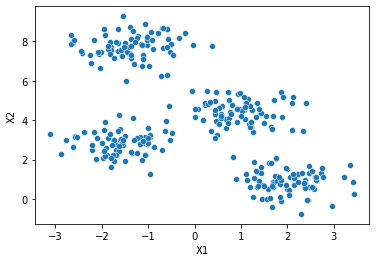

In [2]:
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs


X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.6, random_state=0)

tb_blob = pd.DataFrame(X)
tb_blob.columns = ['X1', 'X2']
sns.scatterplot(data = tb_blob, x = 'X1', y = 'X2');

A partir do gráfico acima podemos inferir que deveria ser possível separar os pontos, através destas duas variáveis, em 4 grupos distintos.

## O que são Centroides?

Os centroides são o centro de massa de cada grupo que vamos calcular.

No algoritmo **KMeans**, devemos especificar quantos grupos iremos buscar através do parametro **n_clusters**.

In [4]:
from sklearn.cluster import KMeans

In [5]:
clu_fit = KMeans(n_clusters = 4)

In [6]:
tb_blob.head()

,X1,X2
0,0.836857,2.136359
1,-1.413658,7.409623
2,1.155213,5.099619
3,-1.018616,7.814915
4,1.271351,1.892542


Quando utilizamos o algoritmo **KMeans** na implatanção da Scikit-Learn, os principais resultados são armazenados nos atributos **kmeans.cluster_centers_** e **kmeans.labels_**

O atributo **kmeans.labels_** guarda as previsões dos agrupamentos para o dataset que utilizamos durante a etapa de aprendizagem. Podemos utilizar o método **kmeans.predict(X)** para obter a mesma variável categórica resultante.

In [7]:
clu_fit = KMeans(n_clusters = 4)

In [8]:
clu_fit.fit(tb_blob[['X1', 'X2']])

KMeans(n_clusters=4)

In [9]:
tb_blob['pred_cluster'] = clu_fit.predict(tb_blob[['X1', 'X2']])
# Também poderíamos usar tb_blob['pred_cluster'] = clu_fit.labels_
tb_blob['pred_cluster'] = tb_blob['pred_cluster'].astype(str)

In [10]:
tb_blob.head()

,X1,X2,pred_cluster
0,0.836857,2.136359,2
1,-1.413658,7.409623,1
2,1.155213,5.099619,3
3,-1.018616,7.814915,1
4,1.271351,1.892542,2


In [11]:
centroids = pd.DataFrame(clu_fit.cluster_centers_)
centroids.columns = ['X1', 'X2']
centroids.head()

,X1,X2
0,-1.584385,2.830813
1,-1.373244,7.753689
2,1.982583,0.867713
3,0.949735,4.419069


[[-1.58438467  2.83081263]
 [-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]]


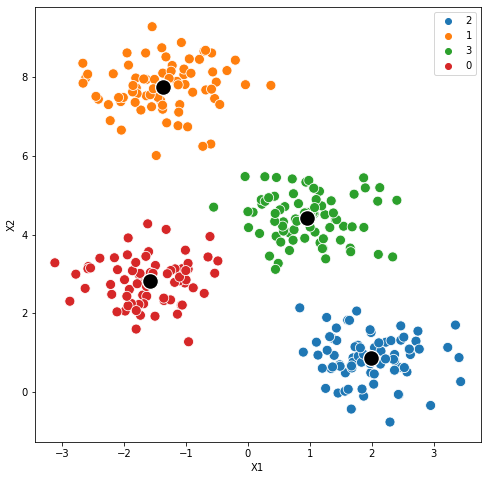

In [12]:
print(clu_fit.cluster_centers_)
plt.figure(figsize=(8,8))
sns.scatterplot(data = tb_blob, x = 'X1', y = 'X2', hue = 'pred_cluster', s = 100);
sns.scatterplot(data = centroids, x = 'X1', y = 'X2', color = 'black', s = 250);

## Os passos de KMeans

### Primeira Iteração

Começamos inicializando um vetor de centroides aleatórios.

In [18]:
X1_guess = np.random.uniform(min(tb_blob['X1']), max(tb_blob['X1']), size = 4)
X2_guess = np.random.uniform(min(tb_blob['X2']), max(tb_blob['X2']), size = 4)
centroids_guess = pd.DataFrame({'X1' : X1_guess, 'X2' : X2_guess})
centroids_guess['iteracao']  = 'IT_0'
centroids_guess

,X1,X2,iteracao
0,-1.096206,4.394361,IT_0
1,0.681832,2.915474,IT_0
2,-3.054147,-0.219508,IT_0
3,-3.044425,8.682599,IT_0


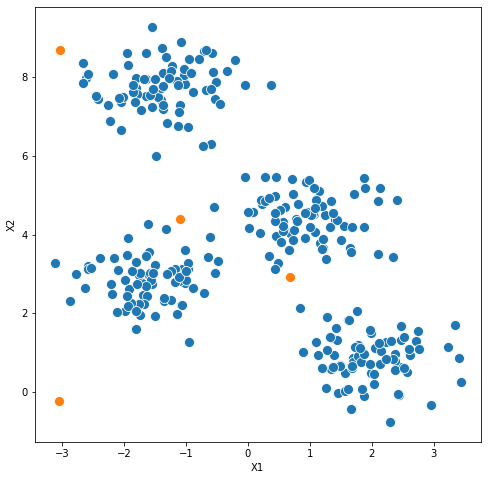

In [19]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = tb_blob, x = 'X1', y = 'X2', s = 100);
sns.scatterplot(data = centroids_guess, x = 'X1', y = 'X2', s = 100);

Usaremos o parâmetro `init=` para especificar que o algoritmo deve iniciar nos nossos centróides.

In [20]:
clu2_fit = KMeans(n_clusters=4, max_iter=1, init=centroids_guess[['X1', 'X2']], n_init=1)
clu2_fit.fit(tb_blob[['X1', 'X2']]);

In [21]:
tb_blob['pred_cluster'] = clu2_fit.predict(tb_blob[['X1', 'X2']])
tb_blob['pred_cluster'] = tb_blob['pred_cluster'].astype(str)
centroids_1it = pd.DataFrame(clu2_fit.cluster_centers_)
centroids_1it.columns = ['X1', 'X2']
centroids_1it['iteracao']  = 'IT_1'

O algoritmo coloca cada ponto do nosso dataset em um cluster, selecionando o cluster cujo centroide esta mais próximo do ponto.  A partir desta classificação, estimamos novos centróides calculando a média de cada cluster.

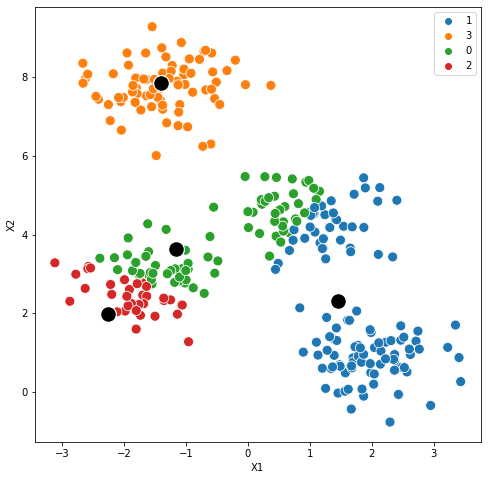

In [22]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = tb_blob, x = 'X1', y = 'X2', hue = 'pred_cluster', s = 100);
sns.scatterplot(data = centroids_1it, x = 'X1', y = 'X2', color = 'black', s = 250);

### Segunda Iteração

As iterações subsequentes do KMeans são identicas: primeiro reclassificamos os pontos de acordo com os novos centróides e então recalculamos um novo vetor de centróides a partir das médias de cada cluster.

In [23]:
clu3_fit = KMeans(n_clusters=4, max_iter=1, init=centroids_1it[['X1', 'X2']], n_init=1)
clu3_fit.fit(tb_blob[['X1', 'X2']])
tb_blob['pred_cluster'] = clu3_fit.predict(tb_blob[['X1', 'X2']])
tb_blob['pred_cluster'] = tb_blob['pred_cluster'].astype(str)
centroids_2it = pd.DataFrame(clu3_fit.cluster_centers_)
centroids_2it.columns = ['X1', 'X2']
centroids_2it['iteracao']  = 'IT_2'

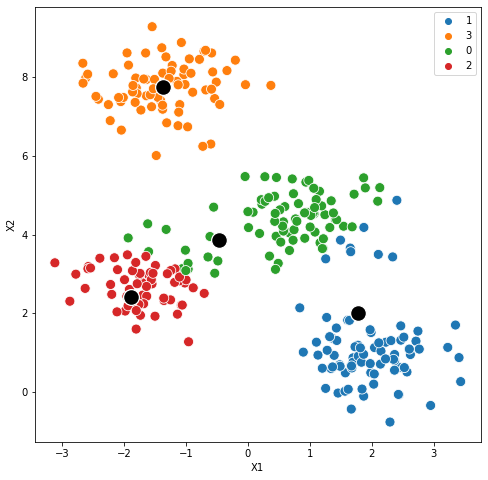

In [24]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = tb_blob, x = 'X1', y = 'X2', hue = 'pred_cluster', s = 100);
sns.scatterplot(data = centroids_2it, x = 'X1', y = 'X2', color = 'black', s = 250);

### Terceira Iteração

In [25]:
clu4_fit = KMeans(n_clusters=4, max_iter=1, init=centroids_2it[['X1', 'X2']], n_init=1)
clu4_fit.fit(X)
tb_blob['pred_cluster'] = clu4_fit.predict(tb_blob[['X1', 'X2']])
tb_blob['pred_cluster'] = tb_blob['pred_cluster'].astype(str)
centroids_3it = pd.DataFrame(clu4_fit.cluster_centers_)
centroids_3it.columns = ['X1', 'X2']
centroids_3it['iteracao']  = 'IT_3'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


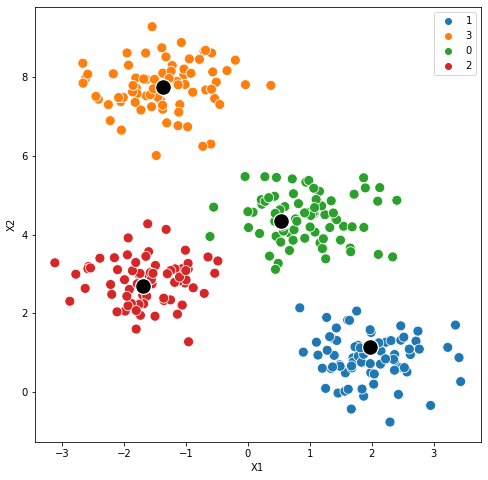

In [27]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = tb_blob, x = 'X1', y = 'X2', hue = 'pred_cluster', s = 100);
sns.scatterplot(data = centroids_3it, x = 'X1', y = 'X2', color = 'black', s = 250);

### 10 Steps at Once

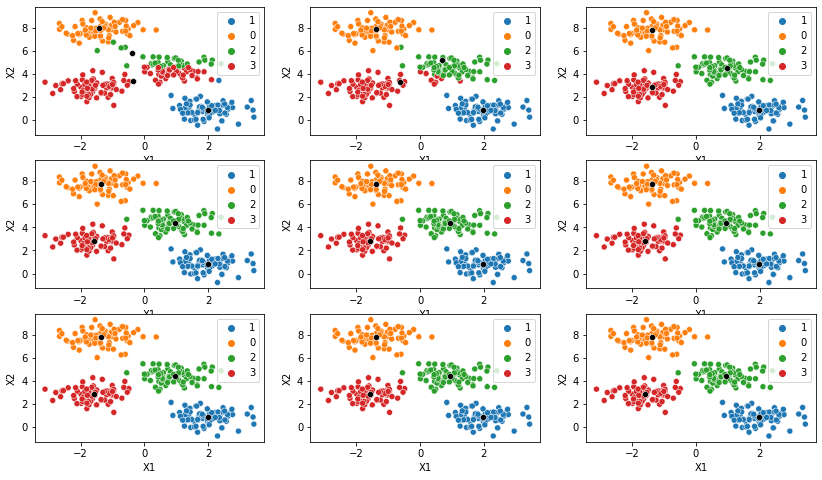

In [31]:
fig, axes = plt.subplots(3,3, figsize=(14,8))

X1_guess = np.random.uniform(min(tb_blob['X1']), max(tb_blob['X1']), size = 4)
X2_guess = np.random.uniform(min(tb_blob['X2']), max(tb_blob['X2']), size = 4)
centroids = pd.DataFrame({'X1' : X1_guess, 'X2' : X2_guess})

for i in range(3):
    for j in range(3):
    
        n_iterations = i + j + 1
        

        clu_fit = KMeans(4, max_iter=1, init=centroids, n_init=1)
        clu_fit.fit(tb_blob[['X1', 'X2']])
        tb_blob['pred_cluster'] = clu_fit.labels_
        tb_blob['pred_cluster'] = tb_blob['pred_cluster'].astype(str)
        
        centroids = pd.DataFrame(clu_fit.cluster_centers_)
        centroids.columns = ['X1', 'X2']
        
        sns.scatterplot(data = tb_blob, x = 'X1', y = 'X2', hue = 'pred_cluster', ax = axes[i,j])
        sns.scatterplot(data = centroids, x = 'X1', y = 'X2', color = 'black', ax = axes[i,j])

## Problemas do KMeans

### Convergência

Temos duas ferramentas para garantir a convergência do algoritmo KMeans:
* Melhorar a seleção dos centroides iniciais
* Processar mais que um conjunto de centroides e selecionar o melhor conjunto

A execução 'padrão' da biblioteca SKLEARN implementa as duas estratégias automaticamente através dos parâmetros `init = 'k-means++'`, utilizando o algoritmo k-means++ para seleção inicial de centroides, e `n_init = 10`, processando 10 conjuntos de centroides diferentes e escolhendo o com clusters mais estáveis.

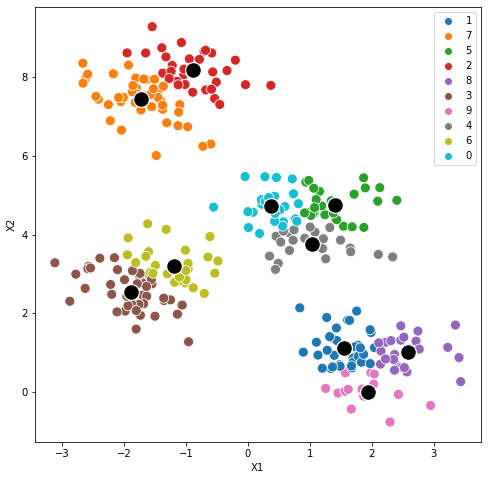

In [36]:
clu_fit = KMeans(n_clusters = 10, init = 'k-means++', n_init = 10)
clu_fit.fit(tb_blob[['X1', 'X2']])
tb_blob['pred_cluster'] = clu_fit.predict(tb_blob[['X1', 'X2']])
tb_blob['pred_cluster'] = tb_blob['pred_cluster'].astype(str)
centroids = pd.DataFrame(clu_fit.cluster_centers_)
centroids.columns = ['X1', 'X2']
plt.figure(figsize=(8,8))
sns.scatterplot(data = tb_blob, x = 'X1', y = 'X2', hue = 'pred_cluster', s = 100);
sns.scatterplot(data = centroids, x = 'X1', y = 'X2', color = 'black', s = 250);

### Selecionando K

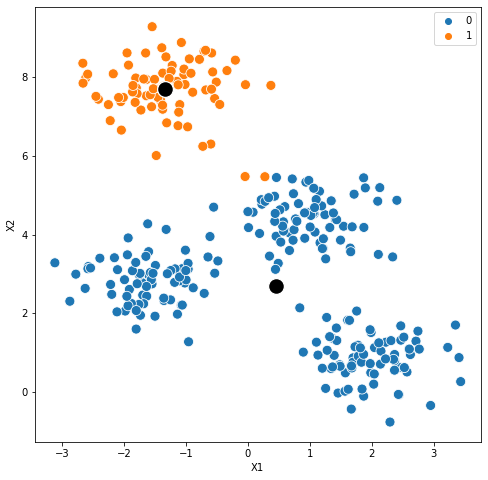

In [37]:
clu_fit = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10)
clu_fit.fit(tb_blob[['X1', 'X2']])
tb_blob['pred_cluster'] = clu_fit.predict(tb_blob[['X1', 'X2']])
tb_blob['pred_cluster'] = tb_blob['pred_cluster'].astype(str)
centroids = pd.DataFrame(clu_fit.cluster_centers_)
centroids.columns = ['X1', 'X2']
plt.figure(figsize=(8,8))
sns.scatterplot(data = tb_blob, x = 'X1', y = 'X2', hue = 'pred_cluster', s = 100);
sns.scatterplot(data = centroids, x = 'X1', y = 'X2', color = 'black', s = 250);

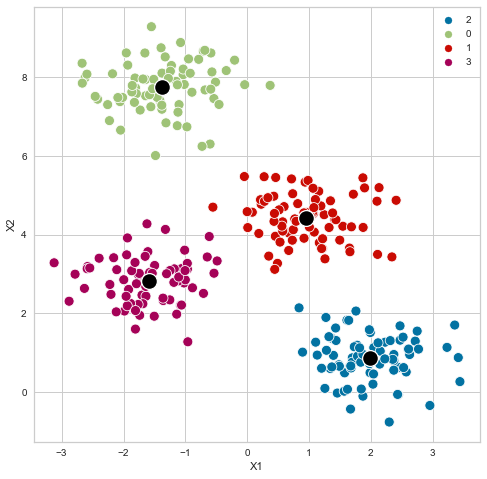

In [48]:
clu_fit = KMeans(n_clusters = 4)
clu_fit.fit(tb_blob[['X1', 'X2']])
tb_blob['pred_cluster'] = clu_fit.predict(tb_blob[['X1', 'X2']])
tb_blob['pred_cluster'] = tb_blob['pred_cluster'].astype(str)
centroids = pd.DataFrame(clu_fit.cluster_centers_)
centroids.columns = ['X1', 'X2']
plt.figure(figsize=(8,8))
sns.scatterplot(data = tb_blob, x = 'X1', y = 'X2', hue = 'pred_cluster', s = 100);
sns.scatterplot(data = centroids, x = 'X1', y = 'X2', color = 'black', s = 250);

#### Inércia

A inércia é uma medida da coesão interna de um cluster: ela mede o quão parecido os pontos de um dado grupo são entre si e é uma medida de distorção (quanto maior, piores os clusters). Ela é medida como a soma do quadrado da distância de cada ponto ao centroide de seu cluster.

https://towardsdatascience.com/clustering-how-to-find-hyperparameters-using-inertia-b0343c6fe819

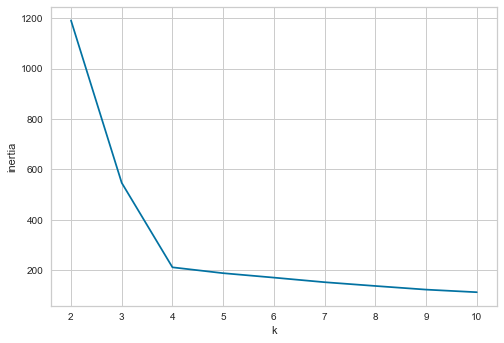

In [46]:
inertia_list = []

for i in range(2, 11):
    clu_fit = KMeans(n_clusters = i)
    clu_fit.fit(tb_blob[['X1', 'X2']])
    inertia_list.append(clu_fit.inertia_)
    
tb_inertia = pd.DataFrame({'k' : list(range(2, 11)), 'inertia' : inertia_list})
sns.lineplot(data = tb_inertia, x = 'k', y = 'inertia');

In [41]:
from yellowbrick.cluster import KElbowVisualizer

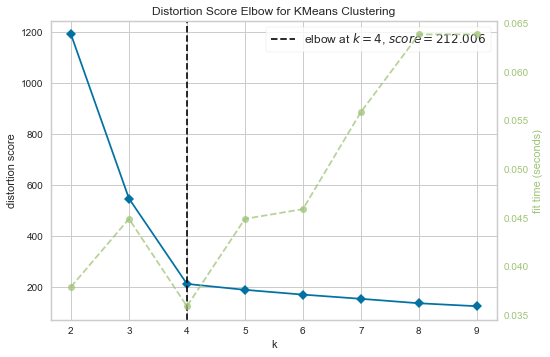

In [42]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(tb_blob[['X1', 'X2']])
visualizer.show();

#### Silhueta

Embora a inércia seja uma ótima medida de quanto cada ponto pertence ao seu cluster ela não leva em conta o quão parecido cada ponto é com os outros clusters. A silhueta é uma medida associada à cada ponto do nosso conjunto de dados que mede a relação entre *o quão parecido cada ponto é com seu proprio cluster* e o *quão parecido cada ponto é com o cluster mais próximo ao qual ele não pertence*. Ela é definida como a diferença entre a distância média de um ponto para cada elemento de seu cluter e a distância de um ponto para cada elemento do cluster mais próximo (que não aquele ao qual ele pertence) normalizada pelo máximo entre essas duas distâncias.

Como ela é medida por ponto, podemos utiliza-la para avaliar quão bem *enquadrado* cada um está em seu cluster - os pontos com silhueta = 1 são os melhores enquadrados, os com silhueta = -1 os piores.

https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891

In [49]:
clu_fit = KMeans(n_clusters = 2)
clu_fit.fit(tb_blob[['X1', 'X2']])
tb_blob['pc_k2'] = clu_fit.predict(tb_blob[['X1', 'X2']])
tb_blob['pc_k2'] = tb_blob['pc_k2'].astype(str)

In [50]:
clu_fit = KMeans(n_clusters = 10)
clu_fit.fit(tb_blob[['X1', 'X2']])
tb_blob['pc_k10'] = clu_fit.predict(tb_blob[['X1', 'X2']])
tb_blob['pc_k10'] = tb_blob['pc_k10'].astype(str)

In [51]:
tb_blob.head()

,X1,X2,pred_cluster,pc_k2,pc_k10
0,0.836857,2.136359,2,1,8
1,-1.413658,7.409623,0,0,1
2,1.155213,5.099619,1,1,7
3,-1.018616,7.814915,0,0,4
4,1.271351,1.892542,2,1,8


In [52]:
from sklearn.metrics import silhouette_samples

In [53]:
tb_blob['sil_k2'] = silhouette_samples(tb_blob[['X1', 'X2']], tb_blob['pc_k2'])
tb_blob['sil_k10'] = silhouette_samples(tb_blob[['X1', 'X2']], tb_blob['pc_k10'])

In [54]:
tb_blob.head()

,X1,X2,pred_cluster,pc_k2,pc_k10,sil_k2,sil_k10
0,0.836857,2.136359,2,1,8,0.625439,0.388561
1,-1.413658,7.409623,0,0,1,0.830734,0.359753
2,1.155213,5.099619,1,1,7,0.175978,0.328383
3,-1.018616,7.814915,0,0,4,0.835520,0.316781
4,1.271351,1.892542,2,1,8,0.632370,0.574495


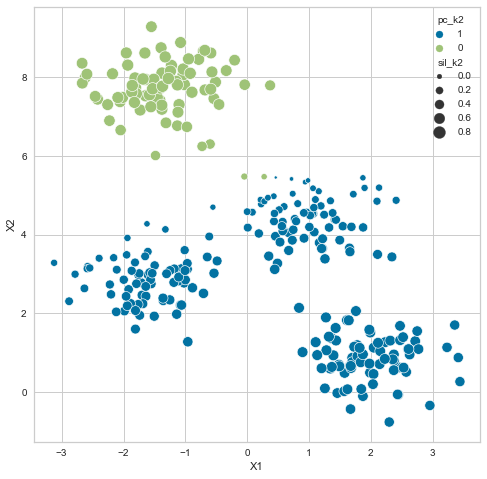

In [55]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=tb_blob,
                x='X1',
                y='X2',
                hue='pc_k2',
                size='sil_k2',
                sizes=(10, 150))

<AxesSubplot:xlabel='X1', ylabel='X2'>

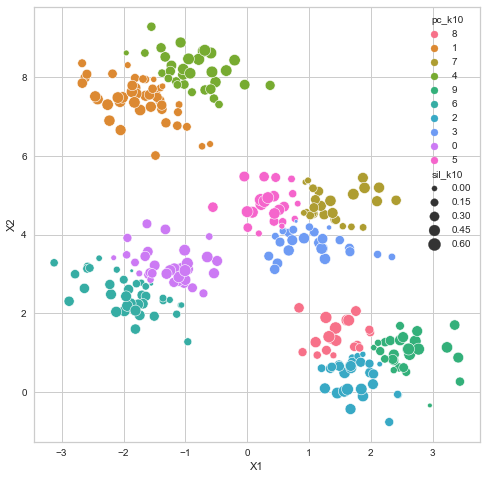

In [56]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=tb_blob,
                x='X1',
                y='X2',
                hue='pc_k10',
                size='sil_k10',
                sizes=(10, 150))

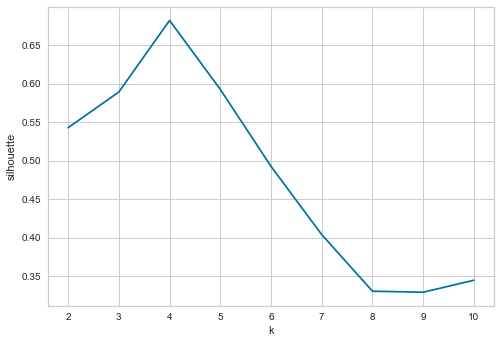

In [57]:
from sklearn.metrics import silhouette_score
sil_list = []

for i in range(2, 11):
    clu_fit = KMeans(n_clusters = i)
    clu_fit.fit(tb_blob[['X1', 'X2']])
    sil = silhouette_score(tb_blob[['X1', 'X2']], clu_fit.labels_)
    sil_list.append(sil)
    
tb_inertia = pd.DataFrame({'k' : list(range(2, 11)), 'silhouette' : sil_list})
sns.lineplot(data = tb_inertia, x = 'k', y = 'silhouette');

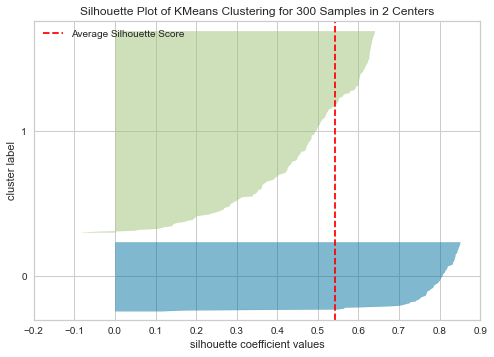

In [65]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(2, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(tb_blob[['X1', 'X2']])
visualizer.show();

# Um exemplo prático

In [66]:
tb_usarrests = pd.read_csv('data/USArrests.csv', index_col=0)
tb_usarrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


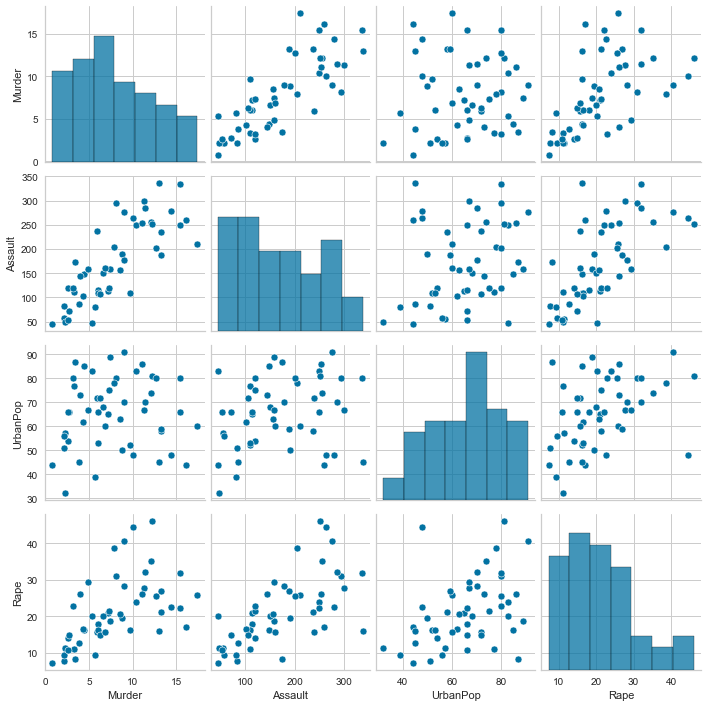

In [67]:
sns.pairplot(data = tb_usarrests)

In [68]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Padronizar os dados

In [69]:
scaler = StandardScaler().fit(tb_usarrests)
tb_std_usa = pd.DataFrame(scaler.transform(tb_usarrests), columns = tb_usarrests.columns)

In [70]:
tb_std_usa.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


## Como visualizar relações em mais do que 2 dimensões?

In [71]:
pca_fit = PCA()
pca_fit.fit(tb_std_usa);
print(np.cumsum(pca_fit.explained_variance_ratio_))
tb_pca_usa = pd.DataFrame(pca_fit.transform(tb_std_usa),
                          columns = ['PC1', 'PC2', 'PC3', 'PC4'])

[0.62006039 0.86750168 0.95664248 1.        ]


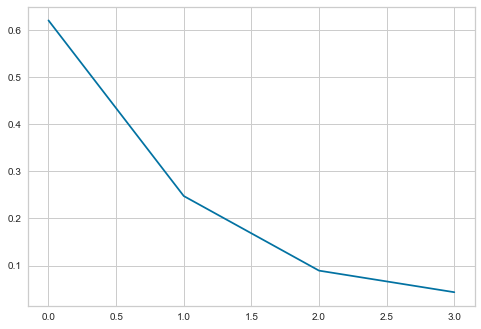

In [73]:
plt.plot(pca_fit.explained_variance_ratio_)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

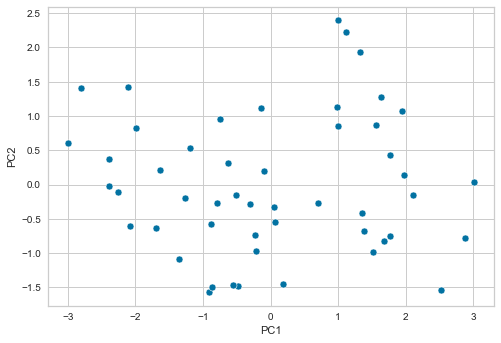

In [72]:
sns.scatterplot(data = tb_pca_usa, x = 'PC1', y = 'PC2')

## Escolhendo K

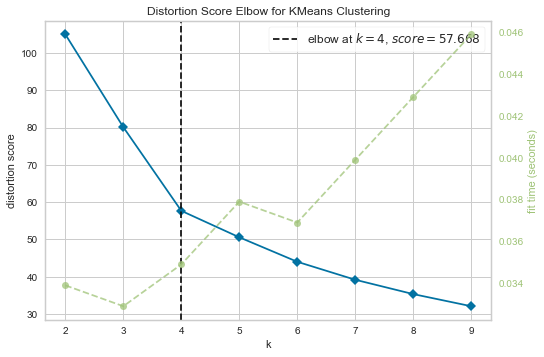

In [74]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(tb_pca_usa)
visualizer.show();

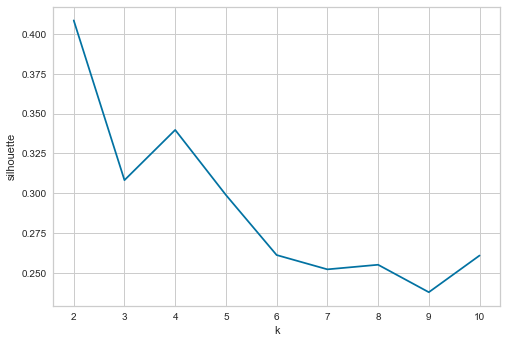

In [75]:
sil_list = []

for i in range(2, 11):
    clu_fit = KMeans(n_clusters = i)
    clu_fit.fit(tb_pca_usa)
    sil = silhouette_score(tb_pca_usa, clu_fit.labels_)
    sil_list.append(sil)
    
tb_inertia = pd.DataFrame({'k' : list(range(2, 11)), 'silhouette' : sil_list})
sns.lineplot(data = tb_inertia, x = 'k', y = 'silhouette');

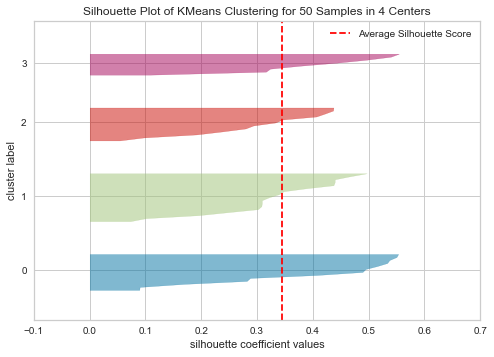

In [77]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(tb_pca_usa)
visualizer.show();

## Analisando os resultados finais

In [84]:
clu_fit_final = KMeans(4)
clu_fit_final.fit(tb_pca_usa)
tb_pca_usa['cluster'] = clu_fit_final.labels_
tb_pca_usa['cluster'] = tb_pca_usa['cluster'].astype(str)
tb_usarrests['cluster'] = clu_fit_final.labels_
tb_usarrests['cluster'] = tb_usarrests['cluster'].astype(str)

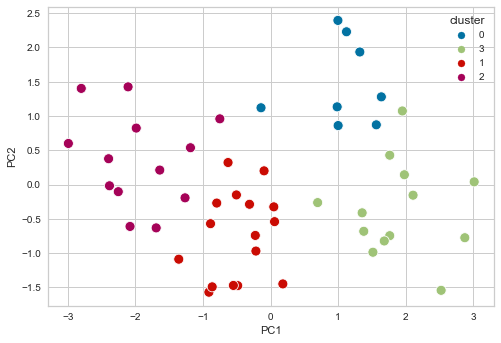

In [87]:
sns.scatterplot(data = tb_pca_usa, x = 'PC1', y = 'PC2', hue = 'cluster', s = 100);

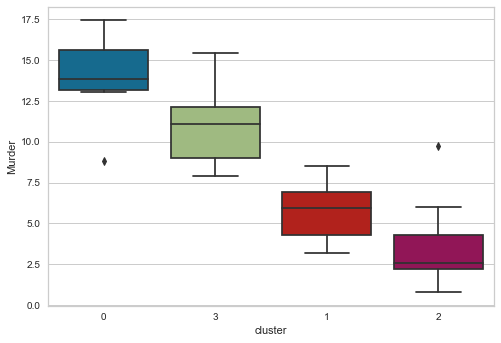

In [88]:
sns.boxplot(data = tb_usarrests, x = 'cluster', y = 'Murder');

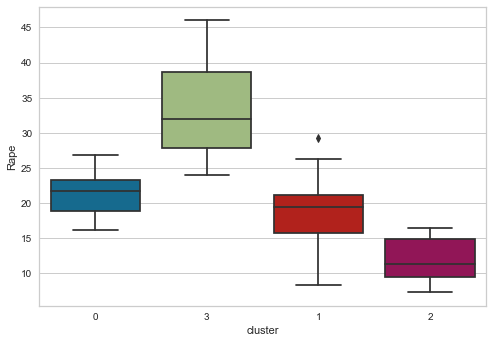

In [89]:
sns.boxplot(data = tb_usarrests, x = 'cluster', y = 'Rape');

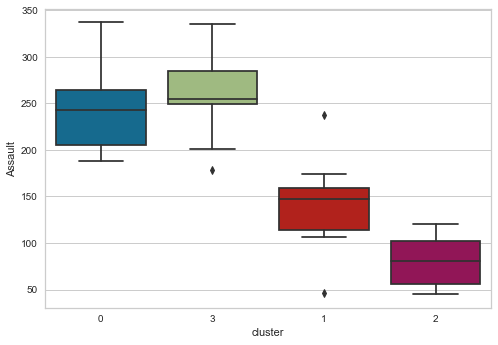

In [90]:
sns.boxplot(data = tb_usarrests, x = 'cluster', y = 'Assault');

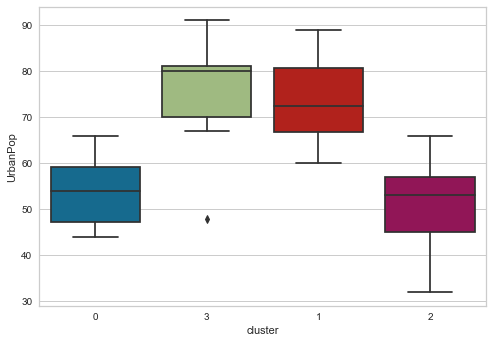

In [91]:
sns.boxplot(data = tb_usarrests, x = 'cluster', y = 'UrbanPop');

In [95]:
tb_usarrests[tb_usarrests['cluster'] == '3']

,Murder,Assault,UrbanPop,Rape,cluster
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,3
California,9.0,276,91,40.6,3
Colorado,7.9,204,78,38.7,3
Florida,15.4,335,80,31.9,3
Illinois,10.4,249,83,24.0,3
Maryland,11.3,300,67,27.8,3
Michigan,12.1,255,74,35.1,3
Missouri,9.0,178,70,28.2,3
Nevada,12.2,252,81,46.0,3


In [98]:
import random
def escolher_aleatório(set_alunos):
    escolhido = random.choice(set_alunos)
    set_alunos.remove(escolhido)
    print(escolhido)
    
alunos = ['andre', 'andres', 'igor', 'joao',
         'lara', 'marcio', 'sergio']

In [101]:
escolher_aleatório(alunos)

sergio
